In [1]:
# import libraries

import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.metrics import confusion_matrix,f1_score,classification_report,roc_curve,auc

In [33]:
# Import data

train_data = pd.read_csv('Data/Balanced_df',index_col=0) # balanced data where # of positive = # of negative
test_data = pd.read_csv('Data/test.csv',index_col=0) # full data with class inbalance


# normalizing the data

train_data = train_data.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
test_data = test_data.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

In [34]:
train_data.head()
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 17991 to 17383
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   points                    1522 non-null   float64
 1   total_rebounds            1522 non-null   float64
 2   assists                   1522 non-null   float64
 3   blocks                    1522 non-null   float64
 4   true_shooting_percentage  1522 non-null   float64
 5   weight                    1522 non-null   float64
 6   height                    1522 non-null   float64
 7   target                    1522 non-null   float64
 8   position_Forward          1522 non-null   float64
 9   position_Guard            1522 non-null   float64
dtypes: float64(10)
memory usage: 130.8 KB
None


In [35]:
test_data.head()
# test_data.info()

,points,total_rebounds,assists,blocks,true_shooting_percentage,weight,height,target,position_Forward,position_Guard
0,0.015199,0.018530,0.011650,0.001773,0.464000,0.368030,0.535714,0.0,1.0,0.0
2,0.203164,0.148834,0.157282,0.021277,0.428444,0.368030,0.500000,0.0,0.0,1.0
3,0.041873,0.052002,0.031068,0.008865,0.435556,0.442379,0.642857,0.0,1.0,0.0
5,0.021092,0.008966,0.033981,0.000000,0.388444,0.219331,0.285714,0.0,0.0,1.0
8,0.035360,0.068141,0.027184,0.008865,0.365333,0.368030,0.571429,0.0,1.0,0.0


In [36]:
# Training
X_train = train_data.drop('target',axis=1)
y_train = train_data['target']

# Testing 
x_test = test_data.drop('target',axis=1)
y_test = test_data['target']

### Logistic Regression

In [37]:
logreg = LogisticRegression(fit_intercept=False,random_state=4)
clf = logreg.fit(X_train,y_train)

In [38]:
yhat = clf.predict(x_test)

In [39]:
confusion_matrix(y_test,yhat)

array([[15485,  6696],
       [  177,   584]], dtype=int64)

Text(0, 0.5, 'Actual')

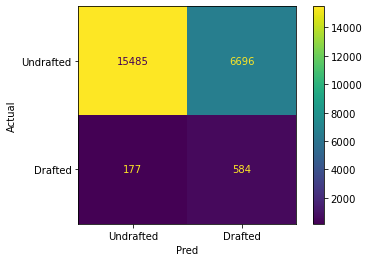

In [40]:
plot_confusion_matrix(clf,x_test,y_test,display_labels=['Undrafted','Drafted'])
plt.xlabel('Pred')
plt.ylabel('Actual')


AUC: 0.8101734499362282


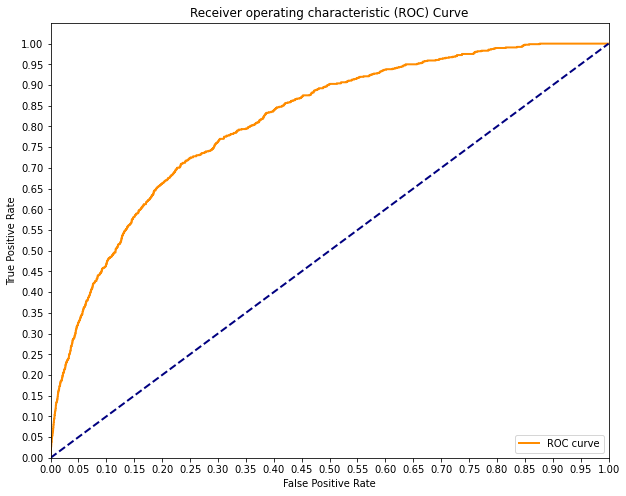

In [41]:
y_score = clf.fit(X_train, y_train).decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

fig = plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [42]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

         0.0       0.99      0.70      0.82     22181
         1.0       0.08      0.77      0.15       761

    accuracy                           0.70     22942
   macro avg       0.53      0.73      0.48     22942
weighted avg       0.96      0.70      0.80     22942

